<a href="https://colab.research.google.com/github/Zikkzakk/Sistem-Rekomendasi/blob/main/Anime_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sistem Rekomendasi Anime**

Halo! pada proyek ini saya menganalisa dataset anime berdasarkan beberapa variabel seperti skor, genre, dan tipe penayangan. Kemudian saya memvisualisasikannya berdasarkan genre, total episode, skor, dan total orang yang meninggalkan ulasan. Model pada proyek ini bekerja dengan cara membandingkan beberapa variabel tapi melalui persamaan kosinus.
Ini adalah proyek rekomendasi pertama saya dan saya berusaha untuk terus meningkatkan kemampuan agar kedepannya dapat melakukan mengkombinasikan beberapa metode yang lebih baik.

### **Credits**
Terimakasih untuk user Kaggle Hernan Valdivieso karena telah menyediakan dataset untuk anime. 
https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020



In [ ]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, ttest_ind, f_oneway

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
#Memasukan dataset ke dalam notebook
anime = pd.read_csv('anime.csv')
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [16]:
#Cleaning. Dataframe hanya akan memasukkan anime TV. Berarti OVA (anime original & video) dan Movie dihilangkan
anime = anime.dropna()
anime = anime.loc[anime['Type'] == 'TV']
anime = anime.loc[anime['Episodes'] != 'Unknown']
anime = anime.loc[anime['Score'] != 'Unknown']

In [17]:
#Merubah tipe data yang awalnya strings
anime['Episodes'] = anime['Episodes'].astype(int)
anime['Score'] = anime['Score'].astype(float)

## **Kolom Genre**
Saat ini, column untuk genre sedikit aneh untuk diolah dan membuat sulit untuk dianalisa. Karena variabel disimpan sebagai string daripada list, anime yang berlabel (Action, Adventure) akan dikategorikan berbeda dari yang berlabel (Adventure, Action). Untuk menghindari ini, saya akan mengulangi setiap indeks di kolom genre untuk mengidentifikasi anime mana yang memiliki genre mana dalam format yang lebih rapi.

In [18]:
action = anime['Genres'].str.contains(pat ='Action')
adventure = anime['Genres'].str.contains(pat ='Adventure')
cars = anime['Genres'].str.contains(pat ='Cars')
comedy = anime['Genres'].str.contains(pat ='Comedy')
dementia = anime['Genres'].str.contains(pat ='Dementia')
demons = anime['Genres'].str.contains(pat ='Demons')
drama = anime['Genres'].str.contains(pat ='Drama')
ecchi = anime['Genres'].str.contains(pat ='Ecchi')
fantasy = anime['Genres'].str.contains(pat ='Fantasy')
game = anime['Genres'].str.contains(pat ='Game')
harem = anime['Genres'].str.contains(pat ='Harem')
historical = anime['Genres'].str.contains(pat ='Historical')
horror = anime['Genres'].str.contains(pat ='Horror')
josei = anime['Genres'].str.contains(pat ='Josei')
kids = anime['Genres'].str.contains(pat ='Kids')
magic = anime['Genres'].str.contains(pat ='Magic')
martial_arts = anime['Genres'].str.contains(pat ='Martial Arts')
mecha = anime['Genres'].str.contains(pat ='Mecha')
military = anime['Genres'].str.contains(pat ='Military')
music = anime['Genres'].str.contains(pat ='Music')
mystery = anime['Genres'].str.contains(pat ='Mystery')
parody = anime['Genres'].str.contains(pat ='Parody')
police = anime['Genres'].str.contains(pat ='Police')
psychological = anime['Genres'].str.contains(pat ='Psychological')
romance = anime['Genres'].str.contains(pat ='Romance')
samurai = anime['Genres'].str.contains(pat ='Samurai')
school = anime['Genres'].str.contains(pat ='School')
sci_fi = anime['Genres'].str.contains(pat ='Sci-Fi')
seinen = anime['Genres'].str.contains(pat ='Seinen')
shoujo = anime['Genres'].str.contains(pat ='Shoujo')
shounen = anime['Genres'].str.contains(pat ='Shounen')
slice_of_life = anime['Genres'].str.contains(pat ='Slice of Life')
space = anime['Genres'].str.contains(pat ='Space')
sports = anime['Genres'].str.contains(pat ='Sport')
super_power = anime['Genres'].str.contains(pat ='Super Power')
thriller = anime['Genres'].str.contains(pat ='Thriller')
vampire = anime['Genres'].str.contains(pat ='Vampire')

In [19]:
#Menambahkan pengklasifikasi ke dataframe
data = anime[['MAL_ID', 'Name', 'Episodes', 'Score', 'Members']]
data = data.assign(action = action, adventure = adventure, cars = cars, comedy = comedy, dementia = dementia,
               demons = demons, drama = drama, ecchi = ecchi, fantasy = fantasy, game = game, harem = harem,
               historical = historical, horror = horror, josei = josei, kids = kids, magic = magic,
               martial_arts = martial_arts, mecha = mecha, military = military, music = music, mystery = mystery,
               parody = parody, police = police, psychological = psychological, romance = romance,
               samurai = samurai, school = school, sci_fi = sci_fi, seinen = seinen, shoujo = shoujo, shounen = shounen,
               slice_of_life = slice_of_life, space = space, sports = sports, super_power = super_power,
               thriller = thriller, vampire = vampire) 

In [20]:
#Membuat dataframe yang rapi
data_melted = data.melt(id_vars = ['MAL_ID', 'Name', 'Episodes', 'Score', 'Members'], value_vars = ['action', 'adventure', 'cars', 'comedy',
                                                                              'dementia', 'demons', 'drama', 'ecchi',
                                                                              'fantasy', 'game', 'harem', 'historical',
                                                                              'horror', 'josei', 'kids', 'magic',
                                                                              'martial_arts', 'mecha', 'military', 'music',
                                                                              'mystery', 'parody', 'police', 'psychological',
                                                                              'romance', 'samurai', 'school', 'sci_fi',
                                                                              'seinen', 'shoujo', 'shounen', 'slice_of_life',
                                                                              'space', 'sports', 'super_power', 'thriller',
                                                                              'vampire'])

In [21]:
# Menghapus rows yang tidak dibutuhkan

data_melted = data_melted.rename(columns = {'variable':'genre'})
data_melted = data_melted.loc[data_melted['value'] != False]
data_melted = data_melted.drop(columns = 'value')
data_melted = data_melted.set_index('MAL_ID')

In [22]:
df = data_melted
df.head()

,Name,Episodes,Score,Members,genre
MAL_ID,,,,,
1,Cowboy Bebop,26,8.78,1251960,action
6,Trigun,26,8.24,558913,action
7,Witch Hunter Robin,26,7.27,94683,action
15,Eyeshield 21,145,7.95,148259,action
18,Initial D Fourth Stage,24,8.15,117929,action


Dataframe utama sudah siap untuk dieksplorasi lebih lanjut.

# **Eksplorasi dan Visualisasi**
Saya ingin tahu apakah durasi pertunjukan dapat memengaruhi skor keseluruhannya. Teori saya adalah bahwa semakin lama anime ditayangkan di TV, maka akan semakin rendah skornya. Misalnya, apakah anime umumnya menjadi lebih baik seiring bertambahnya episode? Apakah anime yang episodenya sedikit lebih disukai daripada anime yang panjang dan berlarut-larut?

In [23]:
print('Description of All Anime:')
df.describe()

Description of All Anime:


,Episodes,Score,Members
count,14208.000000,14208.000000,1.420800e+04
mean,29.996622,7.000346,1.415299e+05
std,62.951675,0.761811,2.645266e+05
min,3.000000,2.180000,3.230000e+02
25%,12.000000,6.490000,7.373000e+03
50%,13.000000,7.020000,3.731500e+04
75%,26.000000,7.490000,1.488868e+05
max,1818.000000,9.190000,2.589552e+06


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribusi Skor Untuk Setiap Anime')

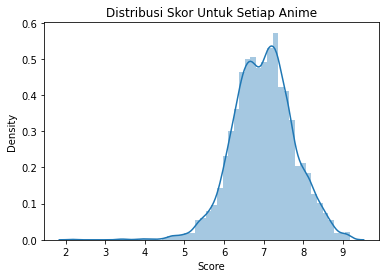

In [24]:
sns.distplot(df['Score']).set_title('Distribusi Skor Untuk Setiap Anime')

(0.0, 10.0)

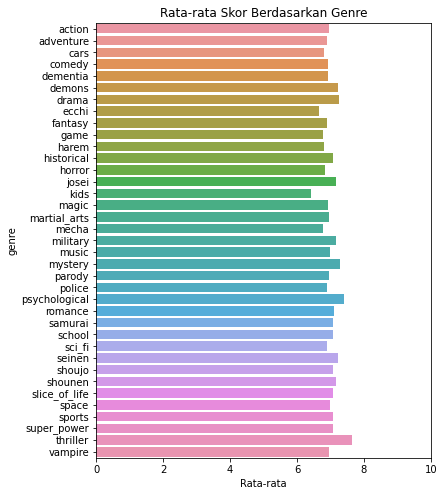

In [26]:
# Melihat rata-rata skor untuk setiap genre
prop_df = (df['Score']
           .groupby(df['genre'])
           .mean()
           .rename('Rata-rata', inplace = True)
           .reset_index())

plt.figure(figsize = (6,8))    

sns.barplot(x = 'Rata-rata', y = 'genre', data = prop_df).set_title('Rata-rata Skor Berdasarkan Genre')

plt.xlim(0, 10)

Text(0.5, 1.0, 'Rata-rata Episode Berdasarkan Genre')

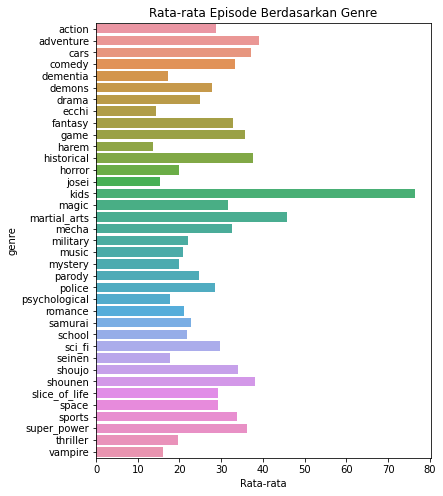

In [27]:
# Rata-rata total episode berdasarkan genre
prop_df2 = (df['Episodes']
           .groupby(df['genre'])
           .mean()
           .rename('Rata-rata', inplace = True)
           .reset_index())

plt.figure(figsize = (6,8))    

sns.barplot(x = 'Rata-rata', y = 'genre', data = prop_df2).set_title('Rata-rata Episode Berdasarkan Genre')

Ini menarik. Selain memiliki skor yang paling rendah, tapi anime dengan genre anak-anak memiliki rata-rata episode yang paling tinggi. Bisa dikatakan bahwa teori saya sebelumnya benar.

# **Sistem Rekomendasi**
Sistem rekomendasi ini akan menggunakan persamaan kosinus antara genre, skor, total episode, dan total anggota sebagai fitur. 

In [ ]:
# Memilih kolom yang dibutuhkan
anime = anime[['Name', 'Score','Episodes','Genres', 'Members']]
anime.head()

,Name,Score,Episodes,Genres,Members
0,Cowboy Bebop,8.78,26,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",1251960
2,Trigun,8.24,26,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",558913
3,Witch Hunter Robin,7.27,26,"Action, Mystery, Police, Supernatural, Drama, ...",94683
4,Bouken Ou Beet,6.98,52,"Adventure, Fantasy, Shounen, Supernatural",13224
5,Eyeshield 21,7.95,145,"Action, Sports, Comedy, Shounen",148259


Karena semua teks dalam setiap kolom ini relevan untuk rekomendasi, kita tidak perlu lagi membersihkan kolom. Semua titik data akan digabungkan menjadi satu kolom agar sesuai dengan rekomendasi berbasis cosinus similarity.

In [ ]:
# Menghapus koma
anime['Genres'] = anime['Genres'].str.replace(',','')

# mengubah kolom menjadi strings
anime['Score'] = anime['Score'].astype(str)
anime['Episodes'] = anime['Episodes'].astype(str)
anime['Members'] = anime['Members'].astype(str)

# menggabungkan semua kolom yang relevan menjadi kolom kunci
anime['Keys'] = anime['Genres'] + ' ' + anime['Score'] + ' ' + anime['Episodes'] + ' ' + anime['Members']
anime = anime[['Name', 'Keys']]
anime.head()

In [ ]:
# Vektorisasi kolom kunci
count = CountVectorizer()
count_matrix = count.fit_transform(anime['Keys'])

# Menghasilkan matriks persamaan kosinus
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [ ]:
# Mengubah indek dataset menjadi nama anime
anime = anime.set_index('Name')

In [ ]:
indices = pd.Series(anime.index)

#  Membuat fungsi yang menggunakan judul anime sebagai input dan menampilkan 10 anime teratas yang direkomendasikan
def recommendations(title, cosine_sim = cosine_sim):
    
    recommended_anime = []
    
    idx = indices[indices == title].index[0]

    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    top_10 = list(score_series.iloc[1:11].index)
    
    for i in top_10:
        recommended_anime.append(list(anime.index)[i])
        
    return recommended_anime

In [ ]:
# Rekomendasi untuk anime "Naruto"
recommendations('Naruto')

['Naruto: Shippuuden',
 'Dragon Ball Kai (2014)',
 'Dragon Ball Z',
 'Dragon Ball Kai',
 'Dragon Ball Super',
 'Dragon Ball',
 'Rekka no Honoo',
 'Virtua Fighter',
 'Medaka Box',
 'Medaka Box Abnormal']

# **Evaluasi**
Membandingkan hasil ini dengan yang ada di MyAnimeList.com, kita dapat melihat bahwa model ini menghasilkan hasil yang cukup mirip! Meskipun MyAnimeList menggunakan metode collaborative-filtering yang kombinasikan dengan rekomendasi pengguna langsung, model saya masih berhasil memberikan hasil yang relevan. Misalnya, dalam kasus Naruto, rekomendasi Dragon Ball tampaknya mendominasi 10 Teratas. Ini sepertinya harus diperbaiki karena pencipta Naruto besar dengan menonton Dragon Ball dan anime naruto sangat terinspirasi oleh Dragon Ball. Banyak kesamaan yang bisa dilihat di kedua anime tersebut.

# **Kesimpulan**
Secara keseluruhan, proyek ini mengajari saya beberapa hal baru dan membantu saya mengidentifikasi lebih jauh kelemahan yang dapat ditimbulkan oleh pendekatan data science tertentu. Saya berharap dikemudian hari akan mengevaluasi proyek ini lagi untuk melihat apakah penilaian saya untuk proyek ini akan berubah. BTW, Ookami to Koushinryou (Spice and Wolf) adalah anime favorit saya.

In [ ]:
# Rekomendasi anime untuk orang yang suka "Ookami to Koushinryou" :)
recommendations('Ookami to Koushinryou')

['Wellber no Monogatari: Sisters of Wellber Zwei',
 'Tales of Eternia The Animation',
 'Kidou Shinsengumi Moeyo Ken TV',
 'Ookami to Koushinryou II',
 'Granblue Fantasy The Animation',
 'Dungeon ni Deai wo Motomeru no wa Machigatteiru Darou ka',
 'Madan no Ou to Vanadis',
 'Groove Adventure Rave',
 'Sengoku Night Blood',
 'Seisen Cerberus: Ryuukoku no Fatalités']